# Classification

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load the heart disease dataset
data = pd.read_csv('/content/framingham.csv')
print(data.columns)
data.head()

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
data.rename(columns = {'male': 'Gender'}, inplace = True)
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
print(data.isnull().sum())
data.head(5)

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:
df=data.dropna(axis=0)
print(df.isnull().sum())

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [17]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
print(X.shape)
print(Y.shape)

(3656, 15)
(3656,)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [19]:
df.describe()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


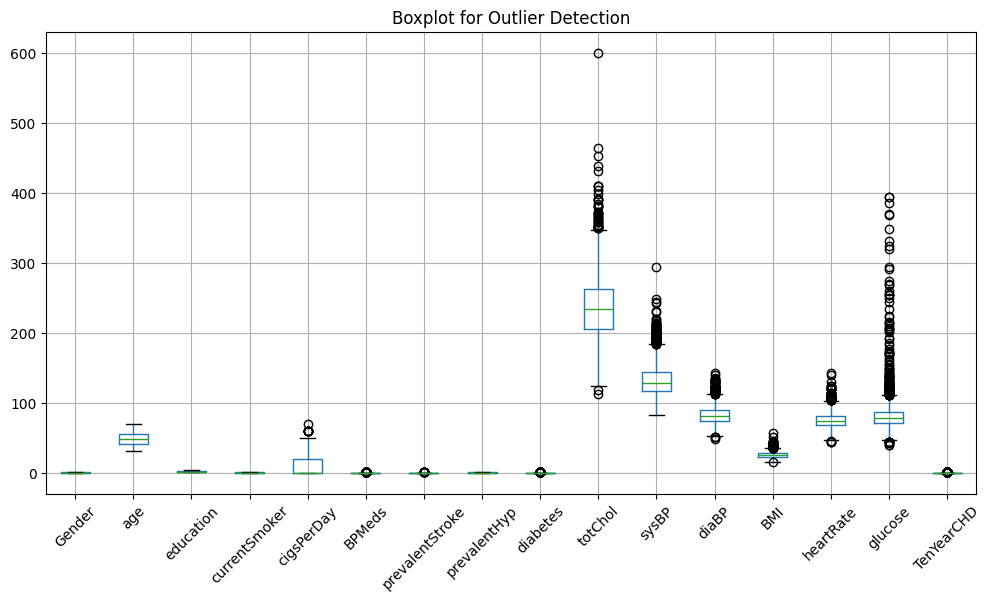

In [20]:
# Visualizing outliers for numerical columns
plt.figure(figsize=(12, 6))
df.boxplot(column=['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'])  # Adjust feature names
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='totChol', ylabel='Count'>

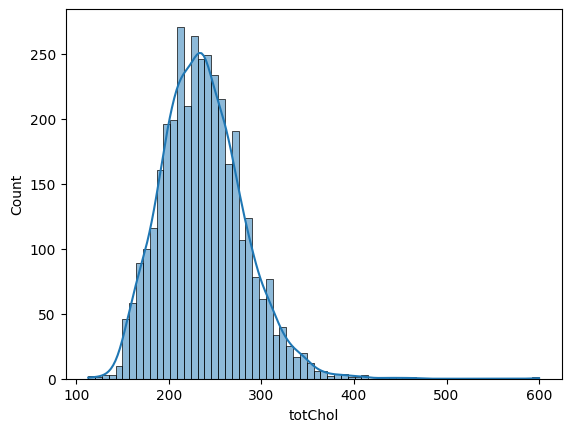

In [21]:
sns.histplot(df['totChol'],kde=True)

<Axes: xlabel='glucose', ylabel='Count'>

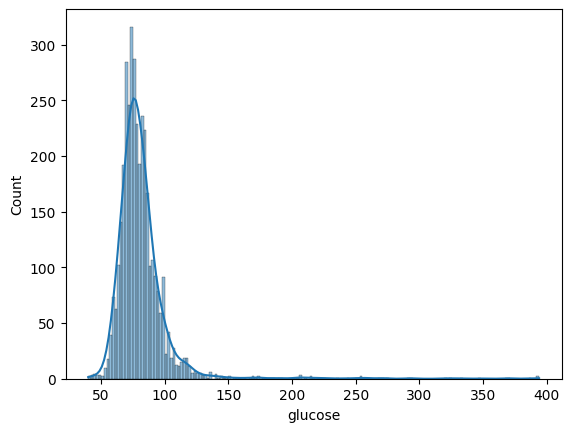

In [22]:
sns.histplot(df['glucose'],kde=True)

In [23]:
# Split the data into training and testing sets
x_train,x_,y_train,y_=train_test_split(X,Y,test_size=0.4,random_state=42)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=42)
print("Training: ",x_train.shape)
print("cv: " ,x_cv.shape)
print("Test: ",x_test.shape)

Training:  (2193, 15)
cv:  (731, 15)
Test:  (732, 15)


In [24]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [25]:
def cost_compute(x,y,w,b):
    m=x.shape[0]
    z=np.dot(x,w)+b
    f_wb=sigmoid(z)
    cost=-(1/m)*np.sum(y*np.log(f_wb)+(1-y)*np.log(1-f_wb))
    return cost

In [26]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    z=np.dot(x,w)+b
    f_wb=sigmoid(z)
    dj_dw=(1/m)*np.dot(x.T,(f_wb-y))
    dj_db=(1/m)*np.sum(f_wb-y)

    return dj_dw , dj_db

In [27]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters):
    j_history=[]
    w=w_in
    b=b_in
    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w-=alpha*dj_dw
        b-=alpha*dj_db
        cost=cost_compute(x,y,w,b)
        j_history.append(cost)
        if i%10000==0:
            print(f"Iterations : {i} /n, Cost: {cost} W : {w} , b: {b}")
    return w,b,j_history

In [28]:
w_in=np.zeros(X.shape[1])
b_in=0
alpha=0.0001
num_iters=220
w_final,b_final,j_hist=gradient_descent(x_train,y_train,w_in,b_in,alpha,num_iters)

print(f"Final Parameters: w :{w_final} , b : {b_final}")

Iterations : 0 /n, Cost: 0.5569104838369552 W : [-1.40674875e-05 -1.66459188e-03 -7.15230278e-05 -1.67122663e-05
 -2.88600091e-04 -3.87596899e-07  0.00000000e+00 -8.41313269e-06
 -4.55996352e-07 -8.12758778e-03 -4.47102143e-03 -2.84095987e-03
 -8.94907661e-04 -2.66203830e-03 -2.79587323e-03] , b: -3.504331965344278e-05
Final Parameters: w :[ 2.87741403e-04  3.84256789e-03 -9.12887188e-04 -2.21900941e-05
  4.05696888e-03  1.36294732e-04  3.52768551e-05  5.72364124e-04
  1.21732439e-04 -3.75498793e-03  5.63406379e-03 -5.89275538e-03
 -3.88291153e-03 -1.49288753e-02 -5.04607229e-04] , b : -0.000254597832716887


In [66]:
def predict(x, w, b):
    # Apply the sigmoid function to the linear combination of features and weights
    z = np.dot(x, w) + b
    f_wb = sigmoid(z)

    # Convert probabilities to binary predictions (0 or 1)
    p = (f_wb >= 0.5).astype(int)

    return p

In [33]:
#cross-validation set
yhat_cv=predict(x_cv,w_final,b_final)
accuracy=accuracy_score(y_cv,yhat_cv)
print("Accuracy: " ,accuracy)
cMatrix=confusion_matrix(y_cv,yhat_cv)
print("Confusion Matrix : " ,cMatrix  )
class_report=classification_report(y_cv,yhat_cv)
print("classification Report: ",class_report)

Accuracy:  0.8508891928864569
Confusion Matrix :  [[622   0]
 [109   0]]
classification Report:                precision    recall  f1-score   support

           0       0.85      1.00      0.92       622
           1       0.00      0.00      0.00       109

    accuracy                           0.85       731
   macro avg       0.43      0.50      0.46       731
weighted avg       0.72      0.85      0.78       731



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [38]:
# Evaluate the model
y_pred = model.predict(x_test)
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Confusion_Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Accuracy: 83.74%
Confusion_Matrix:
 [[607   5]
 [114   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       612
           1       0.55      0.05      0.09       120

    accuracy                           0.84       732
   macro avg       0.69      0.52      0.50       732
weighted avg       0.79      0.84      0.78       732



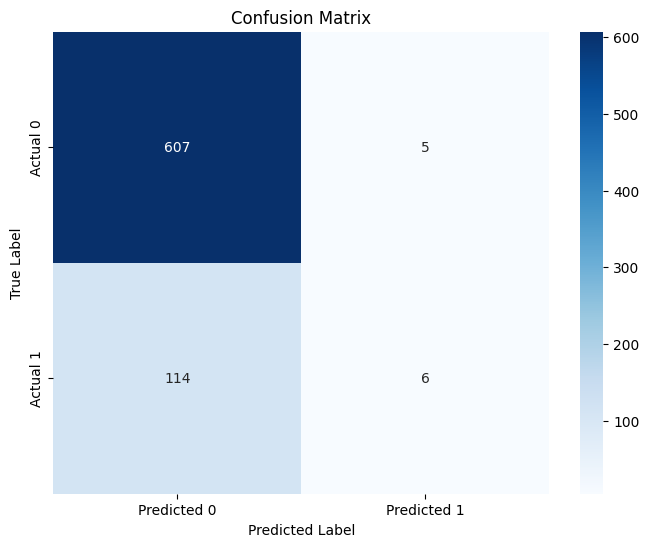

In [39]:
# visualization of confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


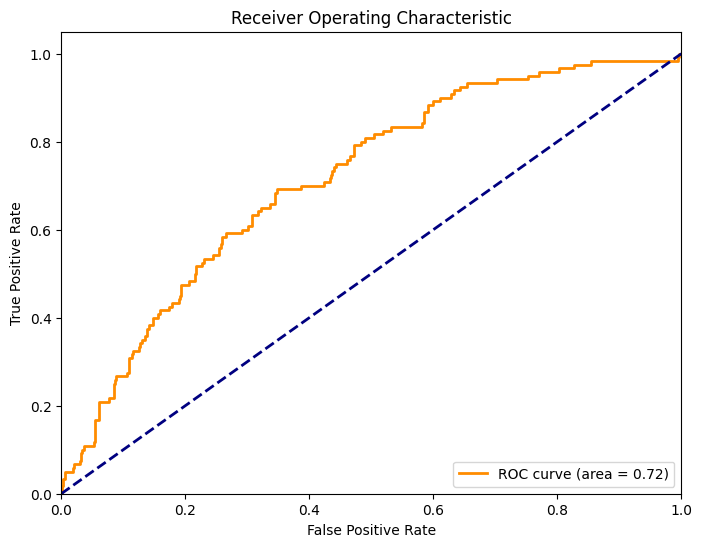

In [42]:
# Calculation of ROC curve and AUC
y_prob = model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Regression

In [43]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,root_mean_squared_error

In [44]:
# Loading the data
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [45]:
df.shape

(205, 26)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [47]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [48]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [49]:
categorical_col = df.select_dtypes(include='object').columns

In [50]:
numeric_col = df.select_dtypes(exclude='object').columns

In [51]:
df.drop(columns=['car_ID', 'symboling', 'CarName'], inplace=True)

In [52]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [53]:
df.shape

(205, 23)

In [54]:
df.isnull().sum()

,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0
carwidth,0
carheight,0


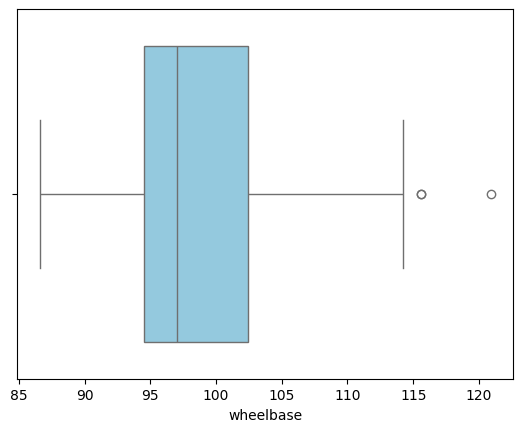

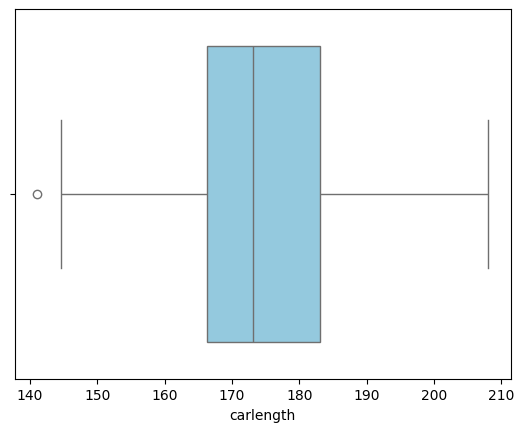

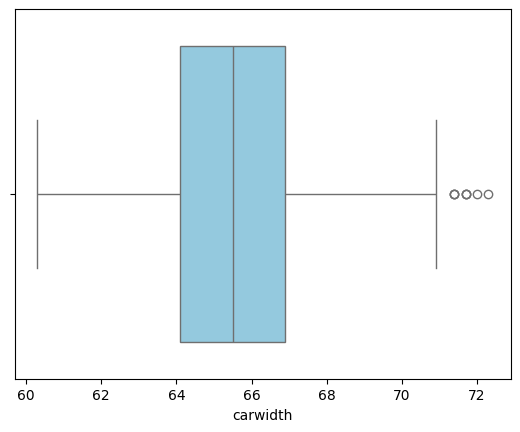

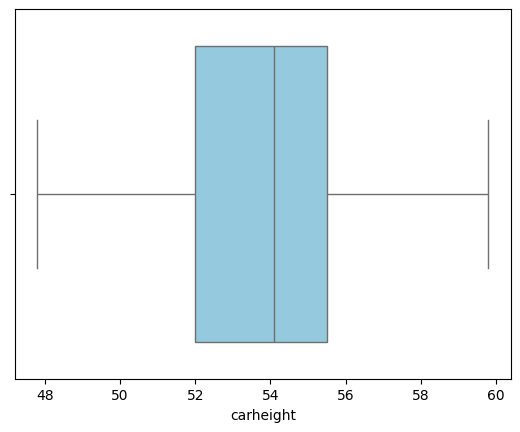

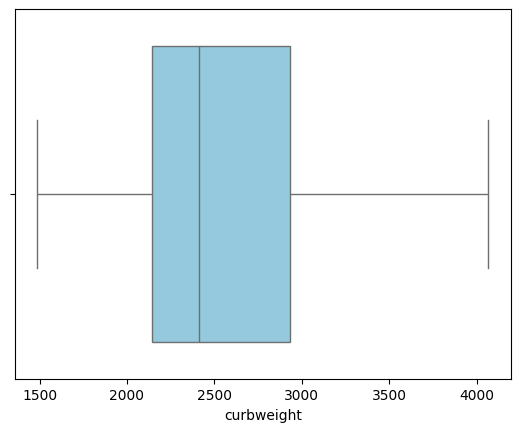

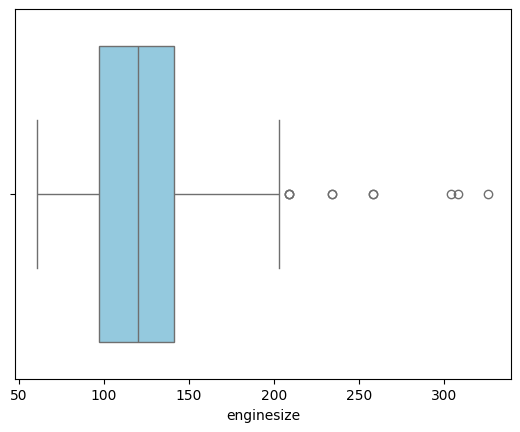

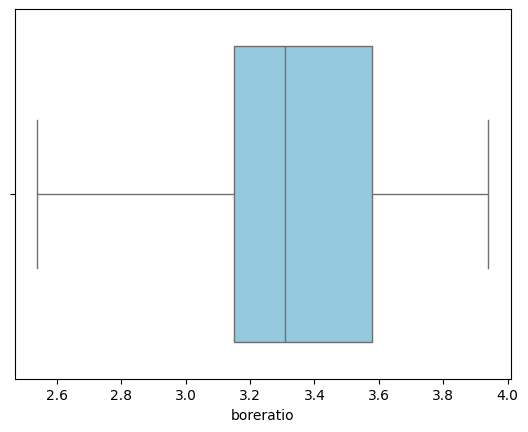

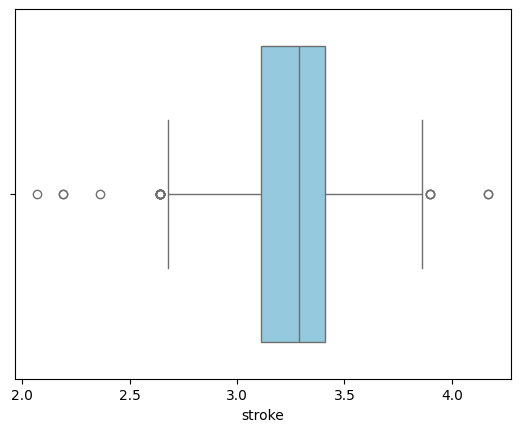

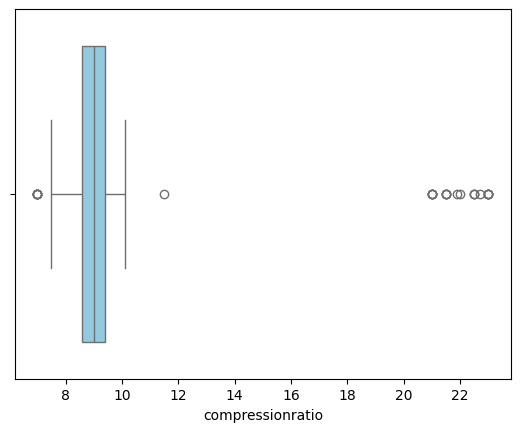

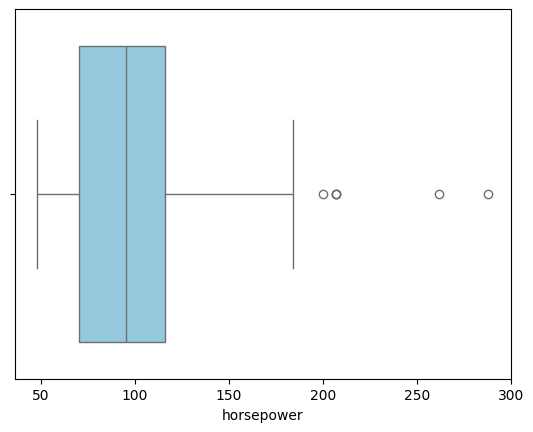

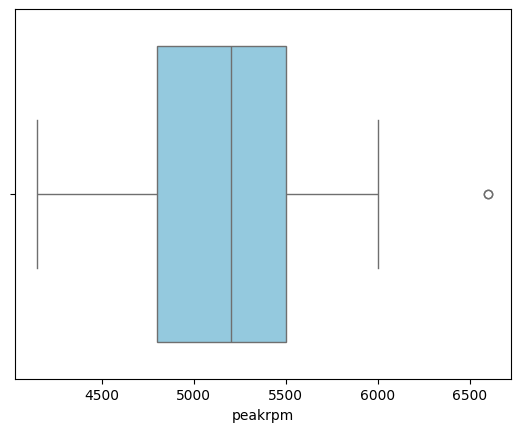

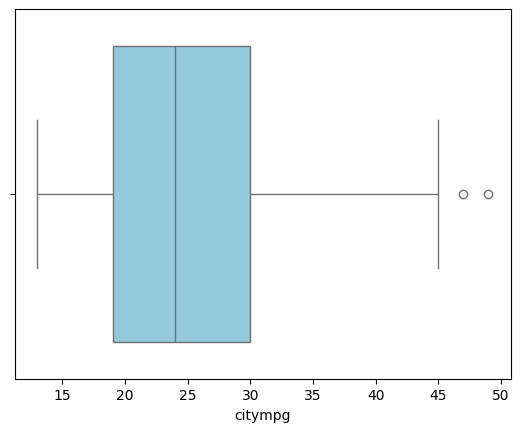

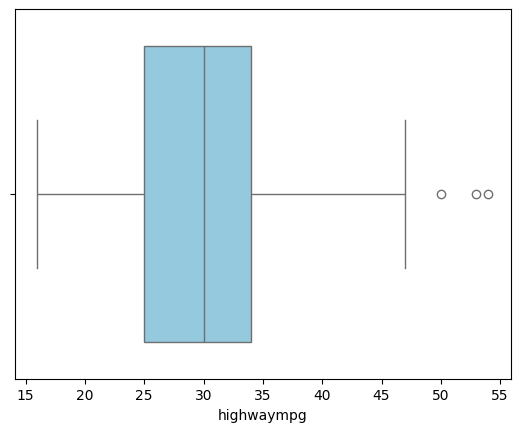

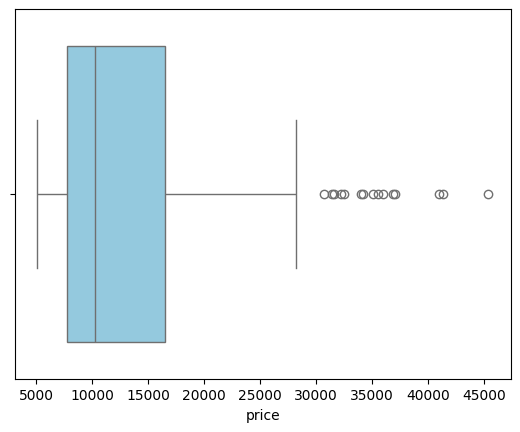

In [55]:
# Visualisation of outliers
col = df.select_dtypes(exclude='object').columns
for i in col:
    sns.boxplot(df[i], orient='h', color='skyblue')
    plt.show()

In [56]:
categorical_col

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [57]:
numeric_col

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [58]:
x = df.drop(columns='price')
y = df['price']

In [59]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((164, 22), (41, 22), (164,), (41,))

In [61]:
# One-hot encode categorical features
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [62]:
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

In [63]:
# Train a logistic regression model
model = LinearRegression()
model.fit(x_train, y_train)

print("Intercept : ",model.intercept_)
print("Coefficient : ",model.coef_)


Intercept :  -33819.481162751195
Coefficient :  [ 9.03542803e+01 -8.02077112e+01  5.70968625e+02  1.12622371e+02
  3.75664003e+00  1.26049554e+02 -2.17000465e+03 -3.89254253e+03
 -2.13693394e+02  2.23608077e+00  2.00253121e+00 -2.49473001e+02
  2.03842158e+02  1.64428221e+03 -1.64428221e+03 -9.32635999e+02
  9.32635999e+02  1.09176489e+02 -1.09176489e+02  2.27206551e+03
 -1.54932427e+03 -3.05758028e+02  5.97573731e+02 -1.01455694e+03
 -1.72988353e+02 -4.27491055e+02  6.00479408e+02 -5.27335801e+03
  5.27335801e+03  9.66518174e+02 -5.25651002e+03 -8.90793476e+02
  3.18765860e+03  1.62054882e+03 -3.41650113e+03  3.78907904e+03
  6.49663783e+03 -1.00383089e+03 -2.04198822e+03 -1.02205357e+03
 -6.21784418e+03  3.78907904e+03  4.75108613e+02  6.98042155e+02
 -6.02779882e+01  1.64428221e+03 -2.04059400e+03  8.12321516e+02
 -1.64280326e+03  1.13920756e+02]


In [64]:
# Calculation of MAE, MSE, RMSE, R2 Score
y_pred = model.predict(x_test)

mae=mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2248.0302676933425
Mean Squared Error: 10016090.985536998
Root Mean Squared Error: 3164.820845725236
R-squared: 0.8731241343685099


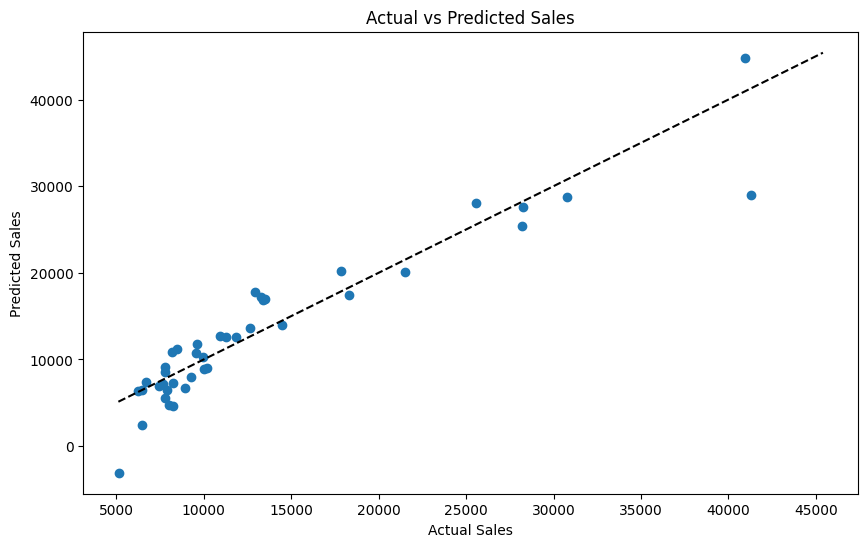

In [65]:
# Regression Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()